# Comparing Storage Cost of Arrays

In [1]:
import numpy as np
import scipy.sparse as sp
import fsm as f
import matplotlib.pyplot as plt
import time

In [2]:
def mem(scipy_array):
    return (scipy_array.indices.size*scipy_array.indices.itemsize +
            scipy_array.indptr.size*scipy_array.indptr.itemsize + 
            scipy_array.data.size*scipy_array.data.itemsize)

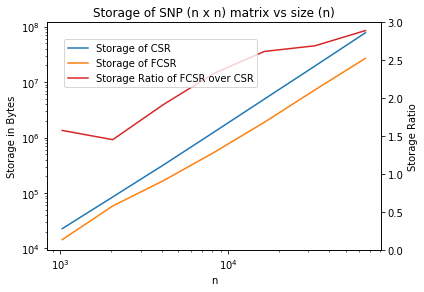

In [32]:
density = .001
min_size = 10
max_size = 17
size = []
mem_scipy = []
mem_fcsr = []
for i in range(min_size, max_size):
    n = 2**i
    size.append(n)
    rows_array, cols_array, data_array, shape = f.sparse.random.SNP_to_coo(n, n, density, 0, data_n=3)
    fcoo_dict = f.sparse.transform.coo_to_fcoo(rows_array, cols_array, data_array, shape)
    fcoo_csr = f.sparse.transform.fcoo_to_fcsr(fcoo_dict, shape)
    f_mat = f.sparse.fcsr_matrix(fcoo_csr, shape)
    mem_fcsr.append(f_mat.mem)
    csr_mat = sp.csr_matrix((data_array,(rows_array, cols_array)), shape)
    mem_scipy.append(mem(csr_mat))
    
improvement = []
for i in range(len(mem_scipy)):
    improvement.append(mem_scipy[i]/mem_fcsr[i])

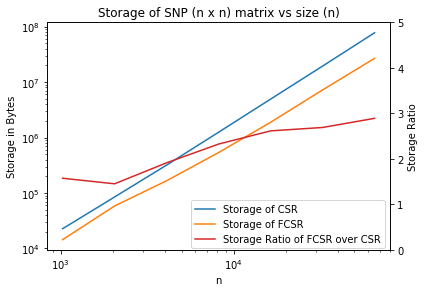

In [42]:
fig, ax1 = plt.subplots()

ax1.set_xlabel('n')
ax1.set_ylabel('Storage in Bytes')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.plot(size, mem_scipy, label = 'Storage of CSR')
ax1.plot(size, mem_fcsr, label='Storage of FCSR')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('Storage Ratio')  # we already handled the x-label with ax1
ax2.plot(size, improvement, label='Storage Ratio of FCSR over CSR', color=color)
ax2.set_xscale('log')
ax2.set_ylim(0,5)
ax2.tick_params(axis='y')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
fig.legend(loc=(.45,.15))
plt.title('Storage of SNP (n x n) matrix vs size (n)')
plt.show()

In [53]:
density = .001
min_size = 10
max_size = 17
max_depth = 5
size = [2**i for i in range(min_size, max_size)]
improvement = {}
for j in range(1,max_depth+1):
    sub_improvement = []
    for i in range(min_size, max_size):
        n = 2**i
        rows_array, cols_array, data_array, shape = f.sparse.random.SNP_to_coo(n, n, density, 0, data_n=j)
        fcoo_dict = f.sparse.transform.coo_to_fcoo(rows_array, cols_array, data_array, shape)
        fcoo_csr = f.sparse.transform.fcoo_to_fcsr(fcoo_dict, shape)
        f_mat = f.sparse.fcsr_matrix(fcoo_csr, shape)
        csr_mat = sp.csr_matrix((data_array,(rows_array, cols_array)), shape)
        sub_improvement.append(mem(csr_mat)/f_mat.mem)
    improvement[j] = sub_improvement

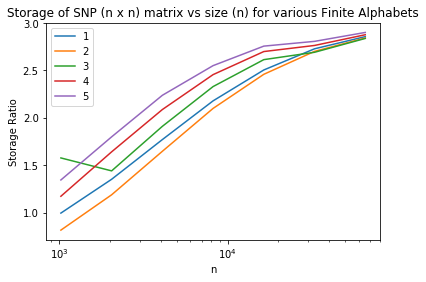

In [58]:
for key, value in improvement.items():
    plt.plot(size, value, label=key)
    
plt.legend()
plt.ylabel('Storage Ratio')
plt.title('Storage of SNP (n x n) matrix vs size (n) for various Finite Alphabets')
plt.xlabel('n')
plt.xscale('log')
plt.show()

In [68]:
density = .001
min_size = 10
max_size = 15
max_depth = 5
size = [2**i for i in range(min_size, max_size)]
improvement = {}
for j in range(1,max_depth+1):
    sub_improvement = []
    for i in range(min_size, max_size):
        n = 2**i
        u = np.random.rand(n)
        rows_array, cols_array, data_array, shape = f.sparse.random.SNP_to_coo(n, n, density, 0, data_n=j)
        fcoo_dict = f.sparse.transform.coo_to_fcoo(rows_array, cols_array, data_array, shape)
        fcoo_csr = f.sparse.transform.fcoo_to_fcsr(fcoo_dict, shape)
        f_mat = f.sparse.fcsr_matrix(fcoo_csr, shape)
        f_mat.dot1d(u)
        start = time.time()
        for _ in range(1000):
            f_mat.dot1d(u)
        fcsr_total = time.time() - start
        
        csr_mat = sp.csr_matrix((data_array,(rows_array, cols_array)), shape)
        csr_mat.dot(u)
        start = time.time()
        for _ in range(1000):
            csr_mat.dot(u)
        csr_total = time.time() - start
        sub_improvement.append(csr_total/fcsr_total)
    improvement[j] = sub_improvement

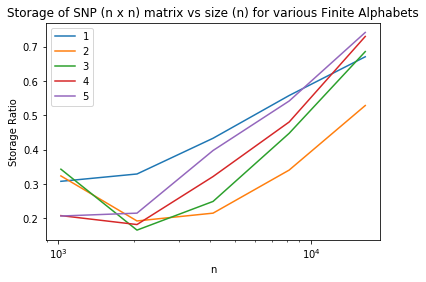

In [69]:
for key, value in improvement.items():
    plt.plot(size, value, label=key)
    
plt.legend()
plt.ylabel('Storage Ratio')
plt.title('Storage of SNP (n x n) matrix vs size (n) for various Finite Alphabets')
plt.xlabel('n')
plt.xscale('log')
plt.show()

In [8]:
rows_array, cols_array, data_array, shape = f.sparse.random.rand_to_coo(10, 10, .1, data_n=5, sym=False)
fcoo_dict = f.sparse.transform.coo_to_fcoo(rows_array, cols_array, data_array, shape)
fcoo_csr = f.sparse.transform.fcoo_to_fcsr(fcoo_dict, shape)

Matrix has sparsity above 10%


In [9]:
f_mat = f.sparse.fcsr_matrix(fcoo_csr, shape)

In [10]:
f_mat.to_array()

array([[0., 0., 0., 5., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 2., 0.],
       [2., 0., 0., 0., 0., 0., 0., 3., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 3.]])

In [24]:
x = np.zeros((10,10))
for i in range(0, 10):
    for j in range(i+1, 10):
        x[i,j] = 1

In [25]:
x

array([[0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

AttributeError: module 'numpy' has no attribute 'factorial'

In [40]:
np.log2(math.factorial(20))

61.07738392090622

In [ ]:
rows_array, cols_array, data_array, shape = rand_to_coo(_m, _n, density, data_n=_k, sym=sym)
array_scipy = csr_matrix((data_array.astype(FLOAT_STORAGE_np), (rows_array, cols_array)), shape)

fcoo = coo_to_fcoo(rows_array, cols_array, data_array, shape)
fcsr = fcoo_to_fcsr(fcoo, shape)